<a href="https://colab.research.google.com/github/pranavj100/EmotionalExhaustion_ML/blob/main/Predicting_the_emotional_exhaustion_of_medical_students_using_behavioral_factors_and_machine_learning_techniques_Code_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This file contains the final experiments and necessary data preprocessing for techniques utilized in the paper 'Predicting the emotional exhaustion of medical students using behavioral factors and machine learning techniques'

In [1]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.0 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [8]:
# General data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

#Model Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [11]:
from google.colab import files
uploaded = files.upload()
medstudents_mh = pd.read_csv("Data Carrard et al. 2022 MedTeach.csv")
medstudents_mh.head
#use any method to import the downloaded dataset and define it

Saving Data Carrard et al. 2022 MedTeach.csv to Data Carrard et al. 2022 MedTeach.csv


<bound method NDFrame.head of        id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  \
0       2   18     1    1    120     1    0      56       3     0    88   
1       4   26     4    1      1     1    0      20       4     0   109   
2       9   21     3    2      1     0    0      36       3     0   106   
3      10   21     2    2      1     0    1      51       5     0   101   
4      13   21     3    1      1     1    0      22       4     0   102   
..    ...  ...   ...  ...    ...   ...  ...     ...     ...   ...   ...   
881  1781   21     2    1      1     1    0      45       3     0   106   
882  1785   20     2    2      1     0    0      13       3     0   113   
883  1787   19     1    1      1     0    0      50       5     0   100   
884  1789   24     5    2      1     0    0      20       2     1   120   
885  1790   22     3    1      1     0    1      20       5     0   102   

     qcae_cog  qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_c

In [12]:
#Regression Data Preprocessing
medstudents_mh = medstudents_mh.drop('age', axis=1)
medstudents_mh = medstudents_mh.drop('glang', axis=1)
medstudents_mh = medstudents_mh.drop('psyt', axis=1)
medstudents_mh = medstudents_mh.drop('id', axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit(medstudents_mh)
scaled_df = scaler.transform(medstudents_mh)
scaled_df = pd.DataFrame(scaled_df,columns=['year','sex','part','job','stud_h','health','jspe','qcae_cog','qcae_aff','amsp','erec_mean','cesd','stai_t','mbi_ex','mbi_cy','mbi_ea'])
X = scaled_df.drop('mbi_ex', axis=1)
y = scaled_df.mbi_ex
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,year,sex,part,job,stud_h,health,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_cy,mbi_ea
0,0.0,0.0,1.0,0.0,0.800000,0.50,0.362069,0.641026,0.300000,0.379310,0.64,0.607143,0.719298,0.45,0.384615
1,0.6,0.0,1.0,0.0,0.285714,0.75,0.724138,0.461538,0.633333,0.551724,0.56,0.125000,0.228070,0.35,0.615385
2,0.4,0.5,0.0,0.0,0.514286,0.50,0.672414,0.692308,0.700000,0.379310,0.56,0.446429,0.929825,0.15,0.500000
3,0.2,0.5,0.0,1.0,0.728571,1.00,0.586207,0.384615,0.500000,0.413793,0.80,0.303571,0.491228,0.30,0.423077
4,0.4,0.0,1.0,0.0,0.314286,0.75,0.603448,0.538462,0.333333,0.517241,0.56,0.250000,0.456140,0.50,0.500000


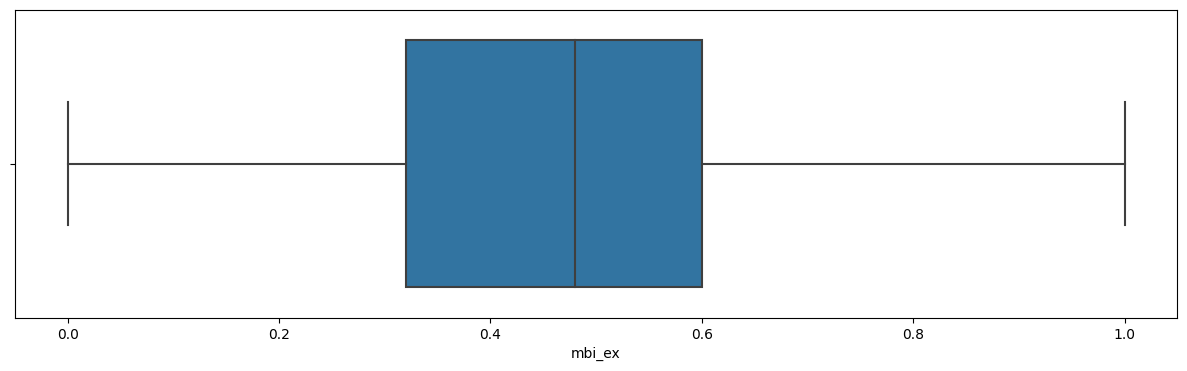

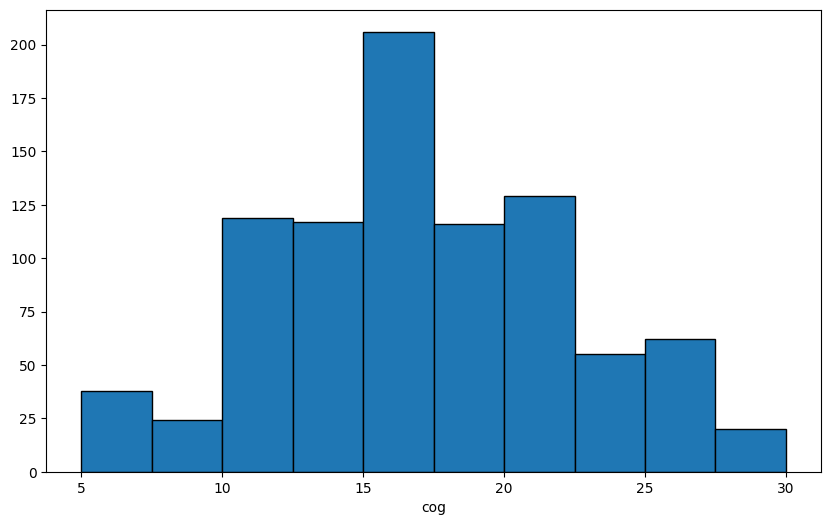

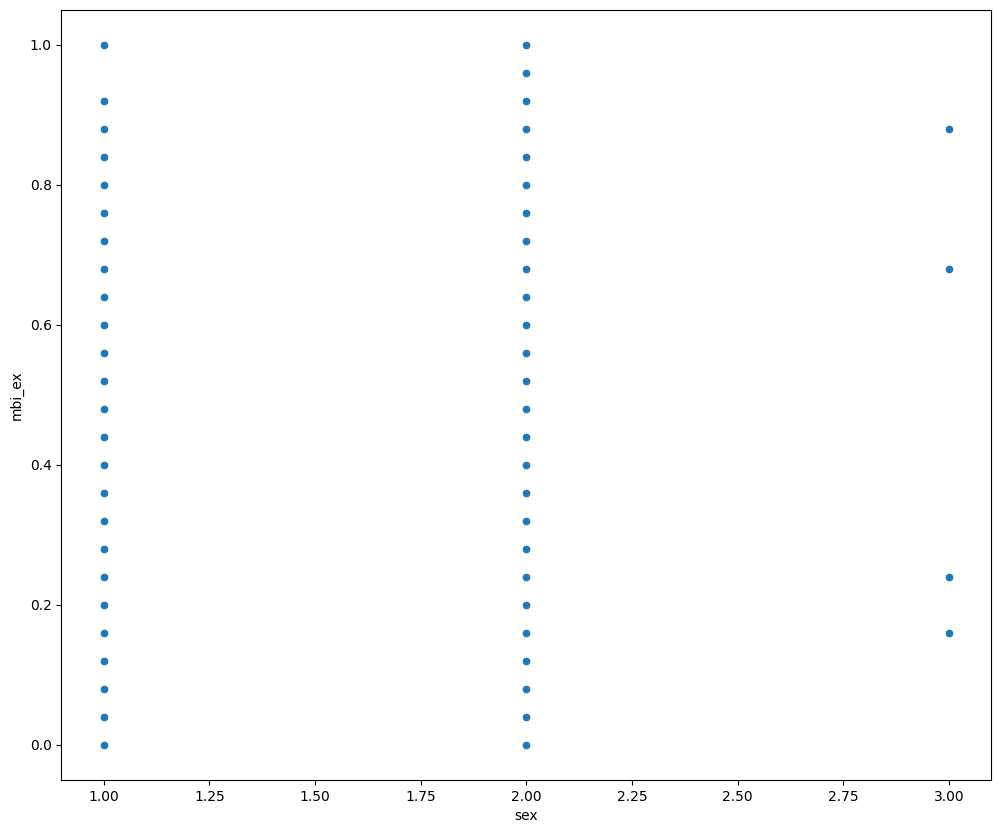

In [13]:
#Data Visualization
plt.figure(figsize=(15,4))
sns.boxplot(x=y)

plt.figure(figsize=(10,6))
plt.hist(medstudents_mh['mbi_ex'], edgecolor = 'black')
plt.xlabel('cog')
plt.show()

plt.figure(figsize=(12,10))
sns.scatterplot(x=medstudents_mh['sex'], y=scaled_df['mbi_ex'])
plt.show()



In [14]:
#Basic Regression Model - Lasso Regression
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.3, max_iter=2500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.17042023741509557

In [15]:
#Basic Regression Model - Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=87, max_features=0.8)
random_forest_model.fit(X_train, y_train)
predictions = random_forest_model.predict(X_test)
mean_absolute_error(y_test, predictions)

0.1270275587916571

In [16]:
#Basic Regression Model - Decision Trees Regressor
from sklearn.tree import DecisionTreeRegressor
random_forest_model = DecisionTreeRegressor(random_state=0, max_depth=3, criterion='friedman_mse')
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.13453346658323592

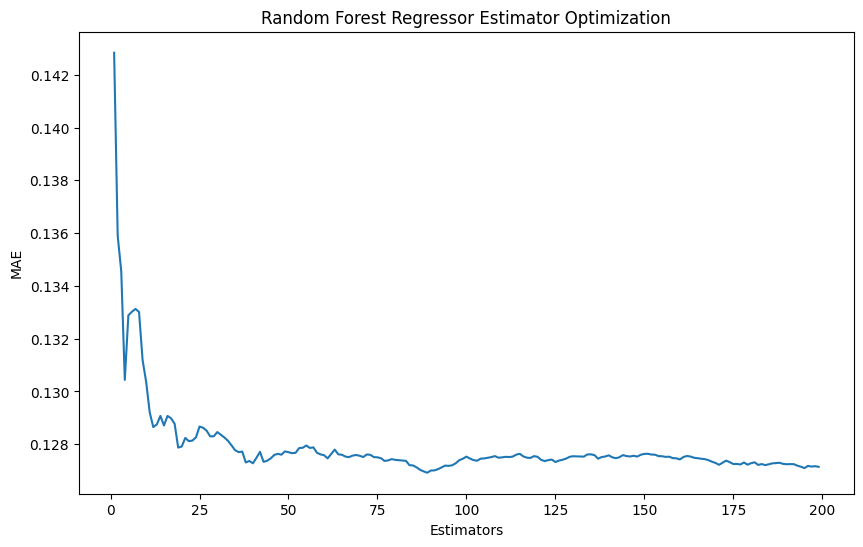

In [18]:
#Example of Feature Optimization
mae_values = []
for k in range(1, 200):
  random_forest_model = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=k, max_features=0.8)
  random_forest_model.fit(X_train, y_train)
  predictions = random_forest_model.predict(X_test)
  mean_absolute_error(y_test, predictions)
  mae_values.append(mean_absolute_error(y_test, predictions))

plt.figure(figsize=(10,6))
plt.xlabel("Estimators")
plt.ylabel("MAE")
plt.title("Random Forest Regressor Estimator Optimization")
plt.plot(range(1, 200), mae_values)

In [19]:
#Categorical Data Preprocessing
def get_categorical_mbi():
  mbi_categorical_features = []
  for i, row in medstudents_mh.iterrows():
    mbi = row['mbi_ex']
    if mbi >= 25:
      category = 'high'
    else:
      category = 'low'
    mbi_categorical_features.append(category)
  return mbi_categorical_features

mbi_categorical_features = get_categorical_mbi()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(mbi_categorical_features)
numerical_features = le.transform(mbi_categorical_features)
print(numerical_features)
X = medstudents_mh.drop('mbi_ex', axis=1)
y = numerical_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 0 1 1 

In [23]:
#Classification Model - Ridge Classifier
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha=0.3, max_iter=2000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9213483146067416

In [25]:
#Classification Model - Catboost Classifier
from catboost import CatBoostClassifier, Pool, metrics, cv
model = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent',
    max_depth = 5,
    iterations = 500,
    learning_rate= 0.1,
    eval_metric= metrics.Accuracy(),
    use_best_model= True,
    loss_function= metrics.Logloss(),
    l2_leaf_reg= 6.0
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.001, verbose=1)

categorical_features_indices = np.where(X.dtypes != float)[0]
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_test, y_test),
     #logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);
print('Best model validation accuracy: {:.4}'.format(
    accuracy_score(y_test, model.predict(X_test))
))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Best model validation accuracy: 0.9438


In [ ]:
#Potential method of optimizing parameters for previous model, time consuming
!pip install hyperopt
import hyperopt
best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(seed=42)
)

print(best)

In [ ]:
#Neural Network Data
X = scaled_df.drop('mbi_ex', axis=1)
y = scaled_df.mbi_ex
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

In [ ]:
#Neural Network
import tensorflow as tf
model = Sequential()
from sklearn.metrics import mean_absolute_error
model.add(Dropout(0.1, input_shape=((X_train.shape[1],))))
model.add(Dense(2000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like
mae_values = []
mae_values2 = []

# compile the model
optimizer = tf.keras.optimizers.Adam(lr=0.4)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.001, verbose=1)
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es, reduce_lr],
                    epochs=5000,
                    batch_size=10,
                    verbose=1)
pred = model.predict(X_test)
trainpreds = model.predict(X_train)
mean_absolute_error(y_train, trainpreds)
mean_absolute_error(y_test, pred)


In [ ]:
#Training and Validation Loss
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# scatterplot of actual vs. pred
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
#Underlying Relationships
plt.figure(figsize=(12,10))
sns.scatterplot(x=X_test['mbi_cy'], y=pred, hue=medstudents_mh['sex'])
plt.show()

plt.scatter(X_test['qcae_cog'], pred)
plt.title('Cognitive Empathy vs. EE')
plt.xlabel('Cog. Empathy')
plt.ylabel('Emotional Exhaustion')
plt.show()

plt.scatter(X_test['qcae_aff'], pred)
plt.title('Affective Empathy vs. EE')
plt.xlabel('Aff. Empathy')
plt.ylabel('Emotional Exhaustion')
plt.show()

plt.figure(figsize=(12,10))
sns.scatterplot(x=scaled_df['year'], y=scaled_df['mbi_ex'])
plt.show()

